In [70]:
#Still need to preprocess to remove things that don't make sense and phrases from other languages
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('fake_or_real_news.csv')
data = data.set_index("Unnamed: 0")
data.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [71]:
data.shape

(6335, 3)

In [72]:
y = data

In [73]:
y.drop("label",axis=1)
y.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [87]:
y['text'] = y['text'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
y['text'] = y['title'].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

#filter out numbers
# df[df['id'].apply(lambda x: isinstance(x, (int, np.int64)))]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.33, random_state=53)

In [89]:
# Use tf-idf and count vectorizer to find most relevant words in corpus
# TfidfVectorizer should remove stop words and words that appear in more than 70% of the articles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english') # already gets rid of stop words
count_train = count_vectorizer.fit_transform(X_train) 
count_test = count_vectorizer.transform(X_test)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)  
tfidf_test = tfidf_vectorizer.transform(X_test)

In [90]:
print(tfidf_vectorizer.get_feature_names()[-10:])
print(count_vectorizer.get_feature_names()[:10])

['zealand', 'zealots', 'zero', 'zika', 'zion', 'zionist', 'zone', 'zuckerberg', 'zuesse', 'zulu']
['00', '000', '00pm', '01', '04', '05', '08', '10', '100', '1000s']


In [91]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zealand,zealots,zero,zika,zion,zionist,zone,zuckerberg,zuesse,zulu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
count_df.describe()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zealand,zealots,zero,zika,zion,zionist,zone,zuckerberg,zuesse,zulu
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000236,0.007069,0.000707,0.000236,0.000236,0.000236,0.000236,0.004241,0.002828,0.000236,...,0.000236,0.000236,0.000471,0.001414,0.000236,0.000943,0.000236,0.000236,0.000471,0.000236
std,0.015350,0.086555,0.026581,0.015350,0.015350,0.015350,0.015350,0.064995,0.053105,0.015350,...,0.015350,0.015350,0.021706,0.048527,0.015350,0.030689,0.015350,0.015350,0.021706,0.015350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.describe()

,00,000,00pm,01,04,05,08,10,100,1000s,...,zealand,zealots,zero,zika,zion,zionist,zone,zuckerberg,zuesse,zulu
count,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000
mean,0.000103,0.001975,0.000369,0.000057,0.000099,0.000102,0.000113,0.001506,0.000945,0.000096,...,0.000106,0.000076,0.000185,0.000479,0.000087,0.000384,0.000106,0.000077,0.000176,0.000070
std,0.006726,0.024248,0.013885,0.003711,0.006436,0.006636,0.007351,0.023411,0.018112,0.006266,...,0.006881,0.004936,0.008633,0.015716,0.005677,0.012786,0.006904,0.004987,0.008108,0.004542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.438188,0.427285,0.539284,0.241785,0.419254,0.432281,0.478901,0.458575,0.467593,0.408217,...,0.448298,0.321555,0.454209,0.584929,0.369809,0.491264,0.449780,0.324874,0.401211,0.295885


In [12]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference 

set()

In [13]:
print(count_df.equals(tfidf_df)) # check if the vectorizers extracted different tokens

False


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# MultinomialNB
multi_nb = MultinomialNB()
np.shape(tfidf_train)
np.shape(y_train)
multi_nb.fit(tfidf_train, y_train['label'])
pred = multi_nb.predict(tfidf_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score) # Multinomial Naive Bayes accuracy: 0.857

accuracy:   0.857


In [15]:
# Use a confusion matrix to compare accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])

In [16]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


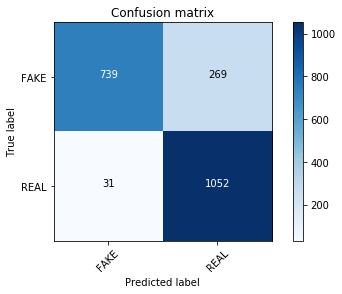

In [17]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

In [18]:
count_multi_nb = MultinomialNB()
count_multi_nb.fit(count_train,y_train['label'])
c_pred = count_multi_nb.predict(count_test)
c_score = accuracy_score(y_test['label'],pred)
print("accuracy:   %0.3f" % c_score)
# this isn't outperforming tf-idf for some reason

accuracy:   0.857


/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.938
Confusion matrix, without normalization


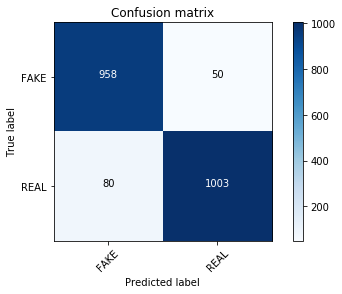

In [28]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(tfidf_train, y_train['label'])
pred = linear_clf.predict(tfidf_test)
linear_score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % linear_score)
linear_cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(linear_cm, classes=['FAKE', 'REAL'])
plt.show()

In [31]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train['label'])
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test['label'], pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [35]:
def most_informative(vectorizer, classifier, n=100):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    for coef,feat in topn_class1:
        print(class_labels[0],coef,feat)    
    print()
    for coef,feat in reversed(topn_class2):
        print(class_labels[1],coef,feat)

In [36]:
most_informative(tfidf_vectorizer,linear_clf,n=30)

FAKE -4.944749971405511 2016
FAKE -4.1669423656757285 october
FAKE -4.026523994008836 hillary
FAKE -3.2379457072220177 share
FAKE -3.0292372538708054 article
FAKE -2.9607067194665926 november
FAKE -2.4151983337760523 print
FAKE -2.3985163920179584 advertisement
FAKE -2.3295109953508275 oct
FAKE -2.293329511922397 email
FAKE -2.2901426518616614 establishment
FAKE -2.155079362142781 mosul
FAKE -2.096459988337095 source
FAKE -2.0697070429869426 nov
FAKE -2.0312120697670104 podesta
FAKE -2.0234581382639623 com
FAKE -2.008642190464127 election
FAKE -1.9862867038088596 war
FAKE -1.8182355194123476 wikileaks
FAKE -1.7659481823588163 snip
FAKE -1.7608720606171246 pipeline
FAKE -1.740498858083451 jewish
FAKE -1.7184297250725813 photo
FAKE -1.714651684609195 wars
FAKE -1.674212508048944 corporate
FAKE -1.649691423424946 ayotte
FAKE -1.6464069676994892 26
FAKE -1.641806470958615 youtube
FAKE -1.6413178120726442 donald
FAKE -1.626466428327845 uk

REAL 4.771958463075412 said
REAL 2.598920654404987 

In [38]:
# Most real
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20] # zip coefficients and sort them

[(-6.257361214701582, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741617, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [39]:
# Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [43]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))

In [44]:
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/Users/victoriacabales/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


accuracy:   0.902
Confusion matrix, without normalization


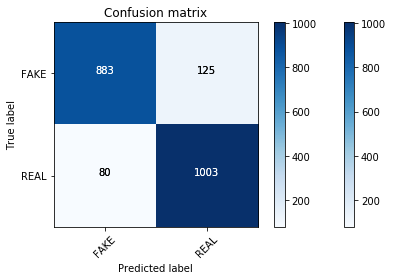

In [54]:
clf = MultinomialNB(alpha=.01)
clf.fit(hash_train, y_train['label'])
pred = clf.predict(hash_test)
score = accuracy_score(y_test['label'], pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test['label'], pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
plt.show()

In [55]:
# defining fake news with simple bag-of-words or TF-IDF vectors is an oversimplified approach

In [1]:
# look up how to make an ROC curve

In [2]:
# TODO: LDA Vis, 10-fold CV, preprocessing, removing stop words

In [3]:
# Visualizations of fake news categories
# Features most associated with the different fake news categories
# Domain names, sentiment analysis

In [6]:
fake_dataset = pd.read_csv('fake.csv')

In [8]:
fake_dataset.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [10]:
fake_dataset.shape

(12999, 20)

In [13]:
fake_dataset.type.unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

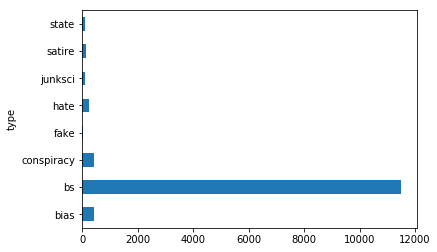

In [16]:
fake_dataset.groupby(['type']).size().plot(kind='barh')
plt.show()